In [1]:
import missingno.missingno as msno

In [2]:
msno.geoplot

<function missingno.missingno.geoplot>

In [3]:
import pandas as pd
collisions = pd.read_csv("NYPD_Motor_Vehicle_Collisions.csv")

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
def m(v):
    if pd.notnull(v):
        return eval(v)
    else:
        return (None, None)
collisions['LOCATION'] = collisions['LOCATION'].map(m)

In [6]:
%matplotlib inline

[ 0.31932471  0.31426969  0.3045977   0.31365517  0.31651767]
[  5.65172310e-03   5.96704877e-04  -9.07528839e-03  -1.78171303e-05
   2.84467755e-03]
[ 0.50282586  0.50029835  0.49546236  0.49999109  0.50142234]


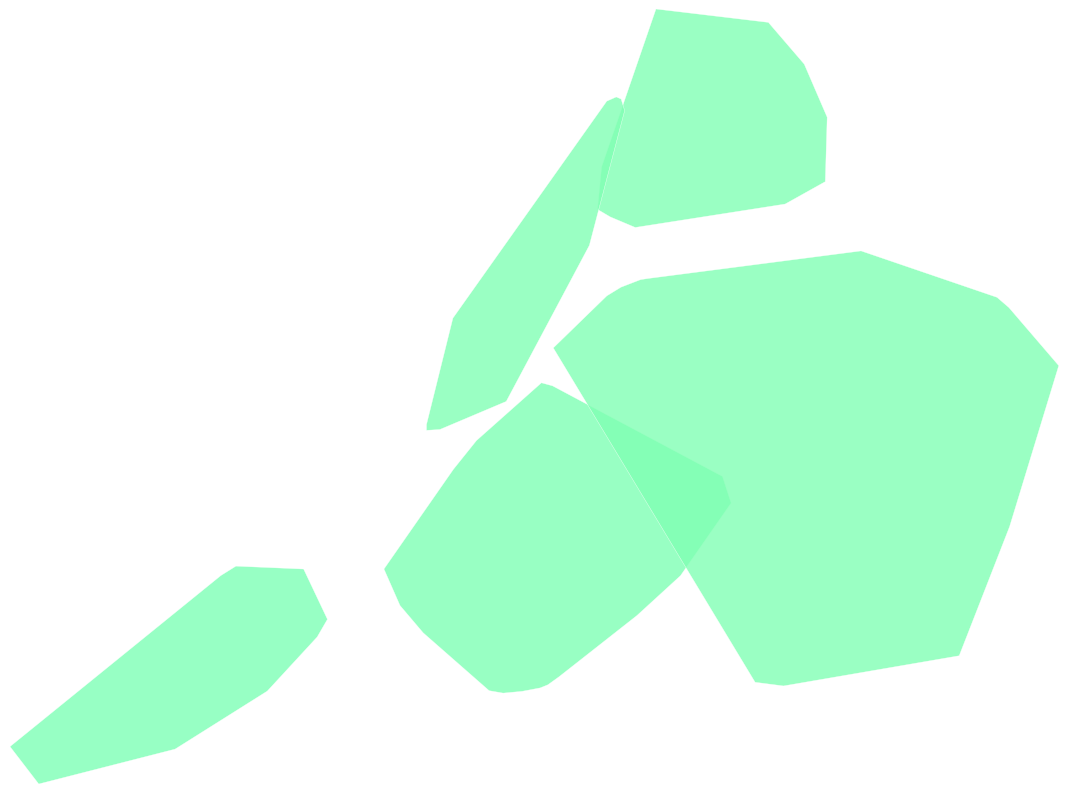

In [109]:
msno.geoplot(collisions.sample(1000), x='LONGITUDE', y='LATITUDE', by='BOROUGH')

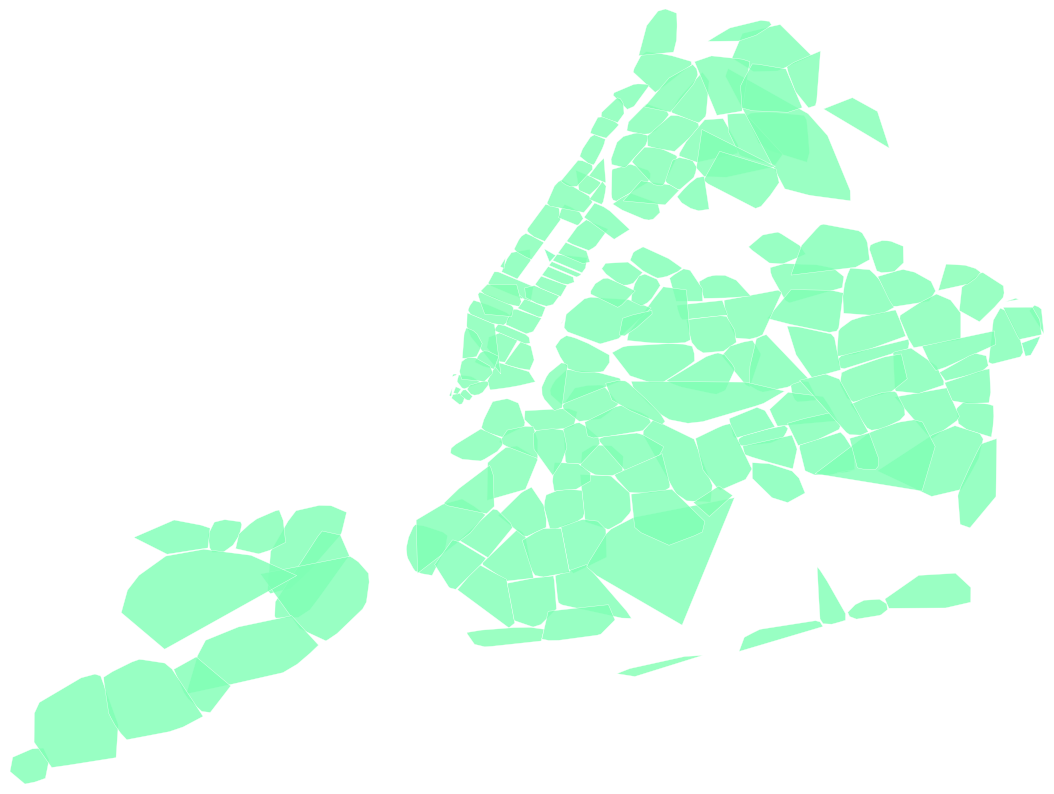

Wall time: 2.5 s


In [111]:
%time msno.geoplot(collisions.sample(100000), x='LONGITUDE', y='LATITUDE', by='ZIP CODE')

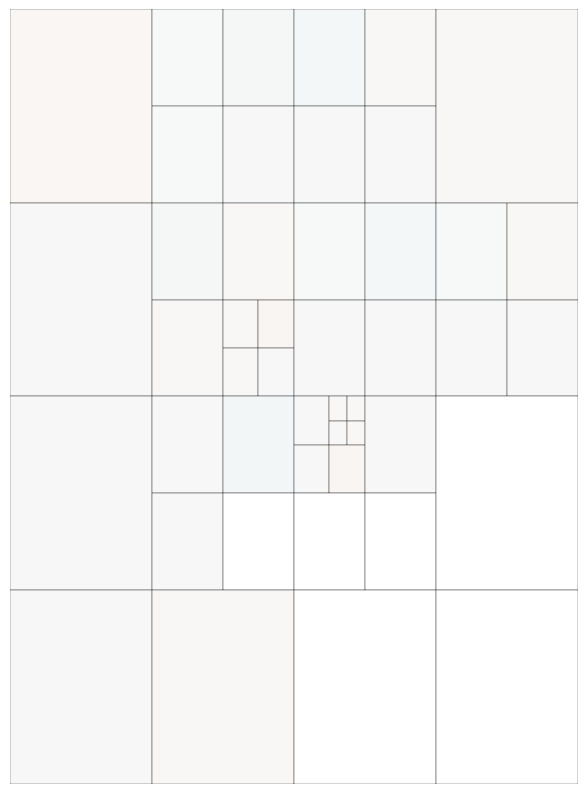

In [123]:
msno.geoplot(collisions.sample(1000), coordinates='LOCATION')

<class 'matplotlib.colorbar.ColorbarBase'>


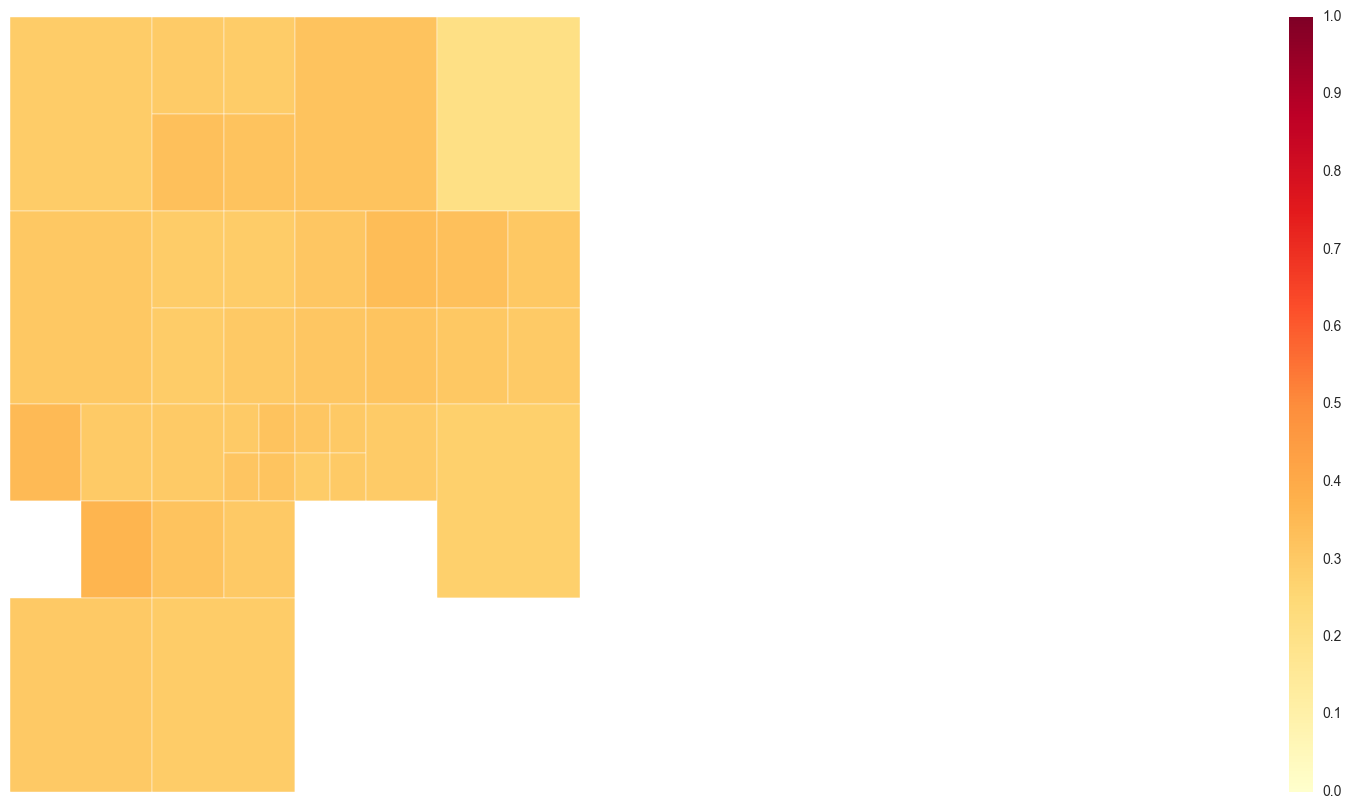

In [172]:
msno.geoplot(collisions.sample(1000), coordinates='LOCATION')

In [169]:
import mpl_toolkits

In [134]:
# %time msno.geoplot(collisions.sample(100000), x='LONGITUDE', y='LATITUDE')

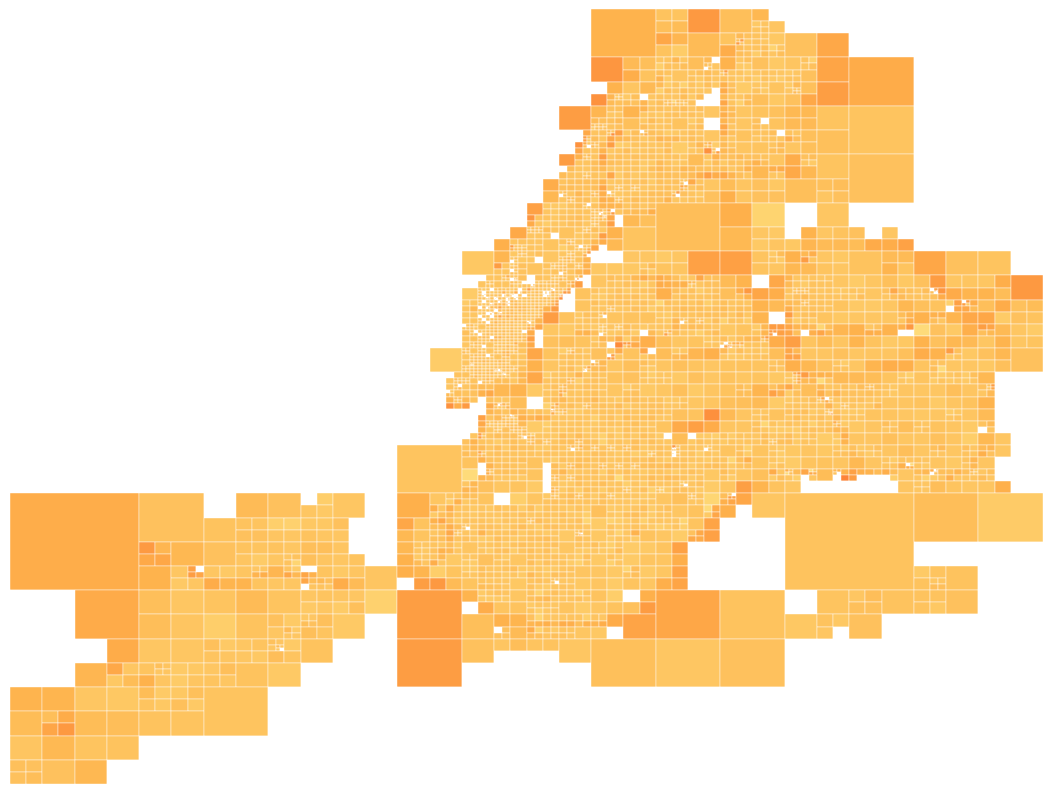

Wall time: 23.6 s


In [138]:
%time msno.geoplot(collisions.sample(100000), x='LONGITUDE', y='LATITUDE')

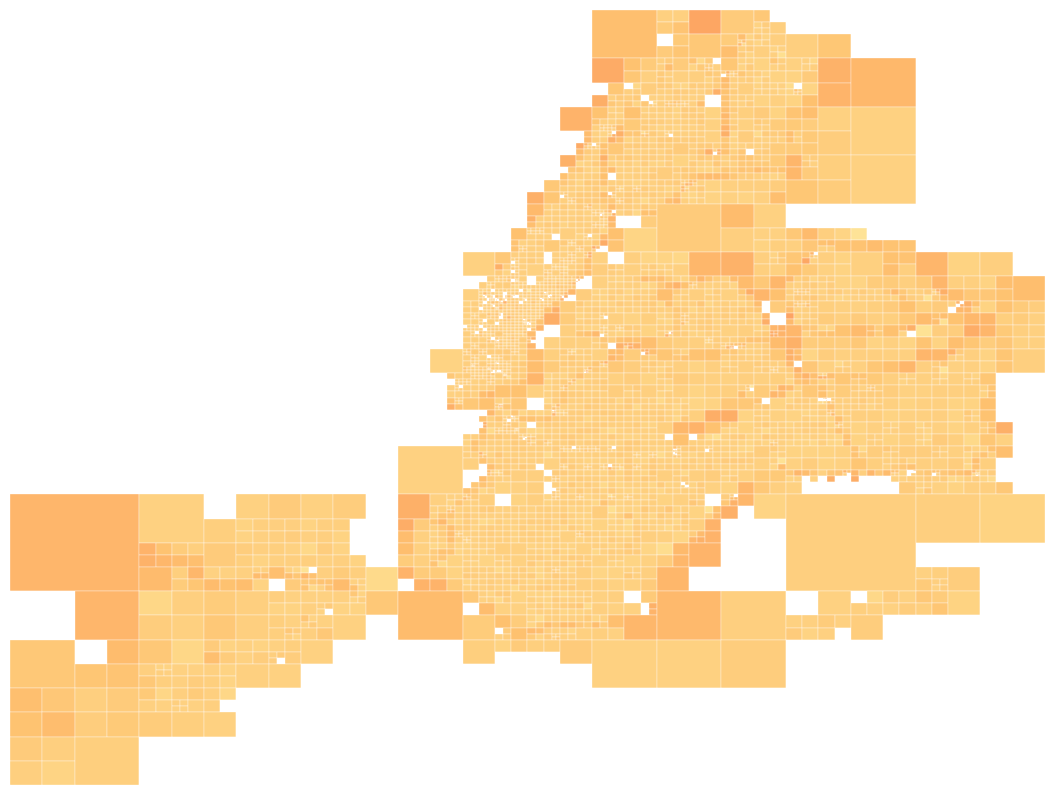

Wall time: 24.1 s


In [126]:
%time msno.geoplot(collisions.sample(100000), x='LONGITUDE', y='LATITUDE')

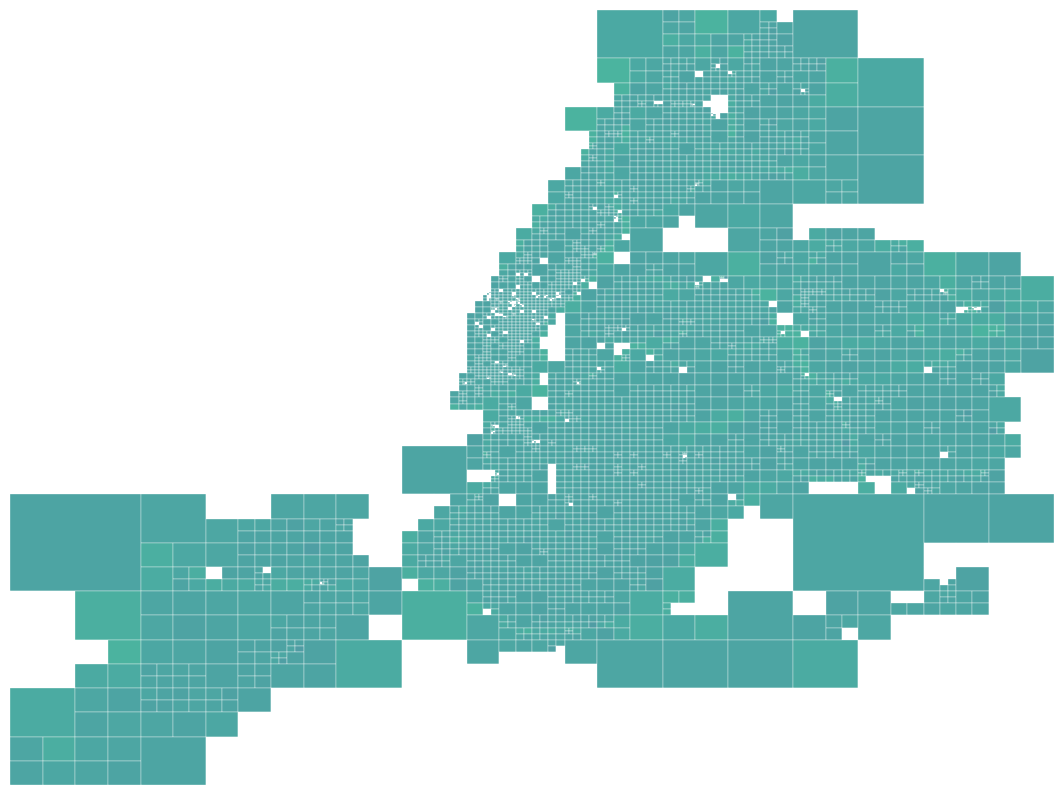

Wall time: 22.3 s


In [125]:
%time msno.geoplot(collisions.sample(100000), x='LONGITUDE', y='LATITUDE')

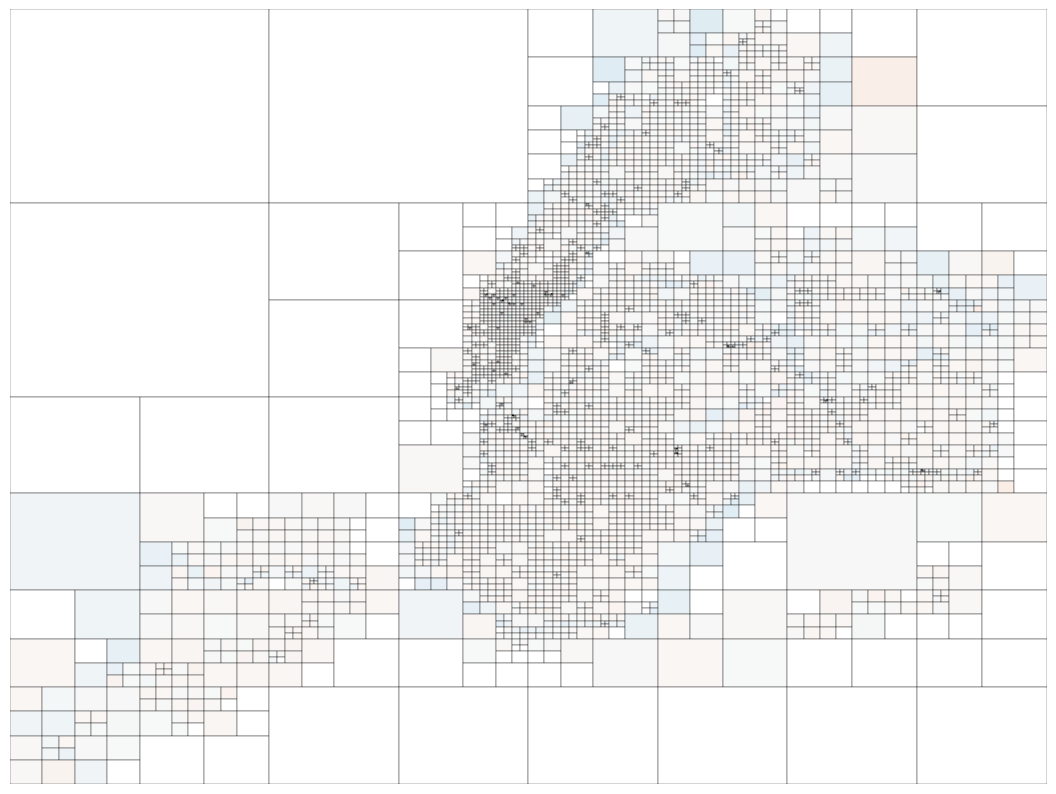

Wall time: 23.4 s


In [124]:
%time msno.geoplot(collisions.sample(100000), x='LONGITUDE', y='LATITUDE')

[ nan  nan  nan ...,  nan  nan  nan]
0.328952580722
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.07590054826901288, 0.10782902847335513, 0.061802632433995697, -0.050935339342736863, 0.0089784537607114911, -0.015955233241941036, 0.0015071893928954028, -0.011711201411702343, nan, nan, nan, nan, nan, -0.016182017951484384, -0.018607753135840288, -0.021481316354231061, -0.018607753135840177, 0.0077700835868240725, nan, -0.030102006009403492, -0.015472956897595758, -0.013302713348041784, -0.016965717011045489, nan, -0.018607753135840288, -0.016965717011045489, nan, -0.018607753135840288, -0.02262161921867184, nan, -0.022174935062118539, nan, nan, -0.018607753135840288, -0.012338160659351227, 0.0016762225233889483, nan, -0.0094123508369896025, 0.0029439710020907617, nan, 0.021622131921631038, 0.084840522726228718, -0.021821983124918121, -0.0091028901827014397, 0.0056578918194599148, -0.0024200136722387078, -0.016883615204805746, 0.0388635112319759, -0.012860626699058741, -0

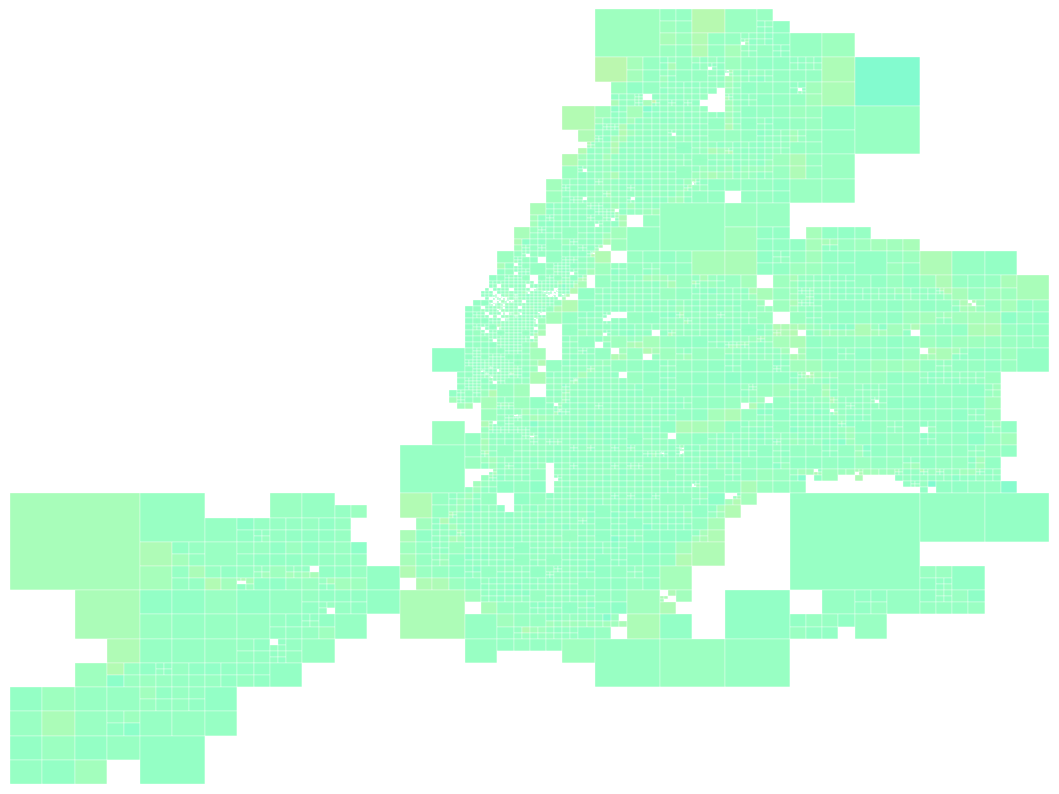

Wall time: 23.1 s


In [121]:
%time msno.geoplot(collisions.sample(100000), x='LONGITUDE', y='LATITUDE')

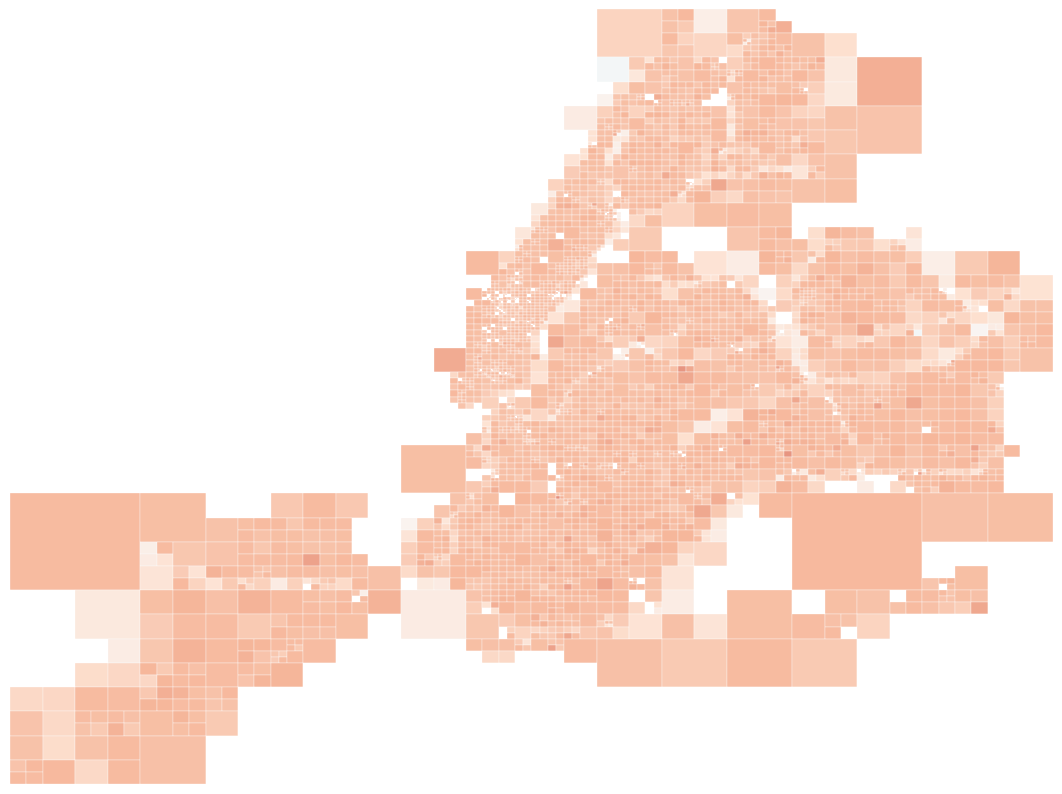

Wall time: 22.2 s


In [96]:
%time msno.geoplot(collisions.sample(100000), x='LONGITUDE', y='LATITUDE')

In [2]:
import geopandas as gpd

In [3]:
boroughs = gpd.read_file("boroughs.geojson", driver='GeoJSON')

In [7]:
boroughs['BoroName'] = [n.upper() for n in boroughs['BoroName']]

In [11]:
geom = boroughs.set_index('BoroName')['geometry']

In [23]:
import shapely

In [25]:
type(geom['STATEN ISLAND'])

shapely.geometry.multipolygon.MultiPolygon

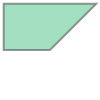

In [35]:
shapely.ops.cascaded_union([shapely.geometry.Polygon([[0,0],[0,1],[2,1],[1,0]]),
                            shapely.geometry.Polygon([[1,1],[2,1],[2,2],[2,1]])])

In [36]:
s = _

In [37]:
s.type

'Polygon'

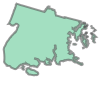

In [42]:
shapely.ops.cascaded_union(p)

In [44]:
geom

BoroName
STATEN ISLAND    (POLYGON ((-74.05050806403247 40.5664220341608...
QUEENS           (POLYGON ((-73.83668274106708 40.5949466970158...
BROOKLYN         (POLYGON ((-73.8670614947212 40.58208797679338...
MANHATTAN        (POLYGON ((-74.01092841268033 40.6844914725429...
BRONX            (POLYGON ((-73.89680883223775 40.7958084451597...
Name: geometry, dtype: object

In [91]:
msno.geoplot(collisions.sample(1000), x='LONGITUDE', y='LATITUDE', by='BOROUGH', geometry=geom)

NameError: name 'geom' is not defined

In [ ]:
# %time msno.geoplot(collisions.sample(100000), coordinates='LOCATION')

Surpisingly completely better way: comparison in pure `numpy`.

In [11]:
import numpy as np

In [29]:
arr = np.random.random(10000)
arr = np.reshape(arr, (5000, 2))

In [30]:
%time arr[(arr[:,0] < 0.5) & (arr[:,1] < 0.5)]

Wall time: 0 ns


array([[ 0.36344712,  0.26554997],
       [ 0.47220453,  0.02869764],
       [ 0.15735973,  0.37269819],
       ..., 
       [ 0.49022383,  0.41526613],
       [ 0.17871078,  0.01075353],
       [ 0.01494709,  0.03158715]])

In [38]:
%time arr[(0.25 < arr[:,0]) & (arr[:,0] < 0.5) & (arr[:,1] < 0.25) & (arr[:,1] < 0.5)]

Wall time: 0 ns


array([[ 0.47220453,  0.02869764],
       [ 0.46175015,  0.00989213],
       [ 0.26361677,  0.07439433],
       [ 0.48964408,  0.12816539],
       [ 0.41354043,  0.23633264],
       [ 0.28557994,  0.08977533],
       [ 0.46808558,  0.17376671],
       [ 0.42360977,  0.22122338],
       [ 0.26336195,  0.08788374],
       [ 0.27985323,  0.23378294],
       [ 0.47760962,  0.09049919],
       [ 0.26229291,  0.06149555],
       [ 0.44084021,  0.20457584],
       [ 0.35053224,  0.01151029],
       [ 0.33225272,  0.07498947],
       [ 0.29483097,  0.17519744],
       [ 0.4250803 ,  0.07868808],
       [ 0.45664363,  0.06144467],
       [ 0.26575395,  0.23071041],
       [ 0.43144047,  0.19528232],
       [ 0.32026099,  0.08277969],
       [ 0.26894272,  0.1436438 ],
       [ 0.29189202,  0.00686297],
       [ 0.36419739,  0.14361742],
       [ 0.49311289,  0.18786412],
       [ 0.30277727,  0.06067175],
       [ 0.28636754,  0.11564348],
       [ 0.44003461,  0.17275601],
       [ 0.41520592,

In [31]:
import pandas as pd

arr_df = pd.DataFrame()
arr_df[0] = arr[:,0]
arr_df[1] = arr[:,1]

In [46]:
(0.25 < arr[:,0]) & (arr[:,0] < 0.5) & (arr[:,1] < 0.25) & (arr[:,1] < 0.5)

array([False, False, False, ..., False, False, False], dtype=bool)

In [47]:
arr_df[(0.25 < arr[:,0]) & (arr[:,0] < 0.5) & (arr[:,1] < 0.25) & (arr[:,1] < 0.5)]

,0,1
3,0.472205,0.028698
9,0.461750,0.009892
25,0.263617,0.074394
32,0.489644,0.128165
45,0.413540,0.236333
47,0.285580,0.089775
86,0.468086,0.173767
106,0.423610,0.221223
107,0.263362,0.087884
121,0.279853,0.233783


Current way: comparison within `pandas`.

In [37]:
%time arr_df[arr_df.apply(lambda srs: (srs[0] < 0.5) and (srs[1]) < 0.5, axis='columns')]

Wall time: 123 ms


,0,1
0,0.363447,0.265550
3,0.472205,0.028698
4,0.157360,0.372698
6,0.129396,0.432601
9,0.461750,0.009892
18,0.189688,0.111344
20,0.279595,0.415278
25,0.263617,0.074394
32,0.489644,0.128165
45,0.413540,0.236333


In [59]:
arr.shape

(5000, 2)

In [61]:
arr2 = arr.reshape((500, 20))

In [69]:
arr2

array([[ 0.36344712,  0.26554997,  0.93316912, ...,  0.6339222 ,
         0.46175015,  0.00989213],
       [ 0.65019367,  0.39091498,  0.97176235, ...,  0.11134363,
         0.90817313,  0.22636958],
       [ 0.27959466,  0.41527769,  0.91604437, ...,  0.59206109,
         0.03116434,  0.74084635],
       ..., 
       [ 0.1004831 ,  0.8758631 ,  0.45902919, ...,  0.24702866,
         0.92105619,  0.93685127],
       [ 0.03227094,  0.376971  ,  0.61434644, ...,  0.53315372,
         0.9862492 ,  0.58213292],
       [ 0.78883632,  0.67469492,  0.74421031, ...,  0.76292973,
         0.83929238,  0.56141502]])

In [70]:
np.sum(arr2 < 0.5, axis=1)

array([13,  5, 10,  8, 10, 11, 11,  8, 12, 10, 10, 10, 13,  7, 12,  4, 11,
        7,  7,  8, 10,  9, 12,  8,  9,  9,  9,  8,  7,  9,  5, 10,  9, 10,
        9, 16,  9,  8, 10, 11, 11, 12,  9,  6, 14, 11,  8, 10, 10,  6, 10,
       13,  7, 13, 12, 10, 11,  8, 12, 16, 13, 10, 11, 10, 11, 11, 11,  4,
        9, 13,  8, 12,  6,  9, 10,  7, 12,  8,  9,  8, 10, 10, 12,  6,  6,
       11, 11,  9, 10,  8, 10, 11,  8, 13, 11,  6, 12,  7, 11, 11, 11, 10,
       11,  9,  7, 13, 10, 11, 11,  9,  9, 12, 11, 13, 10,  8,  9,  7, 10,
       13, 11, 13,  9,  7,  9, 13,  7, 12,  6,  8, 13,  8, 12, 11,  8, 10,
       10, 12, 11, 12, 15, 13, 11, 12, 10, 10, 12, 10,  9,  9,  9,  8,  9,
        5, 10, 11,  9, 12, 15, 15, 15, 12,  9,  8, 10, 13, 12,  8, 10, 11,
       10, 15, 11, 10,  7, 10,  3, 11,  8, 11, 12, 10, 15, 10, 12,  8, 10,
       11,  9, 14, 11, 12, 10, 13, 15, 10,  9,  4,  7,  9, 13,  8,  7,  8,
       13, 10, 10, 10, 10,  9, 14, 14,  9,  7,  8, 10,  9,  9, 13, 13, 11,
       11, 10, 10, 13,  8

In [71]:
np.mean(np.sum(arr2 < 0.5, axis=1))

10.066000000000001